## Дунай А.А. Домашнее задание. Метод ближайших соседей

### Цель:
#### В этом домашнем задании вам предстоит поработать с достаточно небольшим, но интересным датасетом по раку груди. Признаками в этом наборе  данных являются различные измерения образований в груди, такие как радиус, симметричность, и т.д. 
#### Целевая переменная - диагноз, является ли новообразование злокачественным или нет.

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np

from IPython.display import display, Image
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, recall_score, auc

import matplotlib.pyplot as plt

### Загрузим датасет

In [5]:
df = pd.read_csv('data.csv')
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


### Посмотрим на базовые статистики датасета

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### По всем столбцам получаем
#### count - количество значений
#### mean - среднее значение
#### std - стандартное отклонение
#### min,max - значения
#### 50% - медиана
#### 25% и 75% - квартили

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Посмотрим распределение признаков в зависимости от целевой переменной

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
features = [
'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'
]
to_drop = [
'id', 'diagnosis', 'Unnamed: 32'
]

### Посмотрим на распределение признаков

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

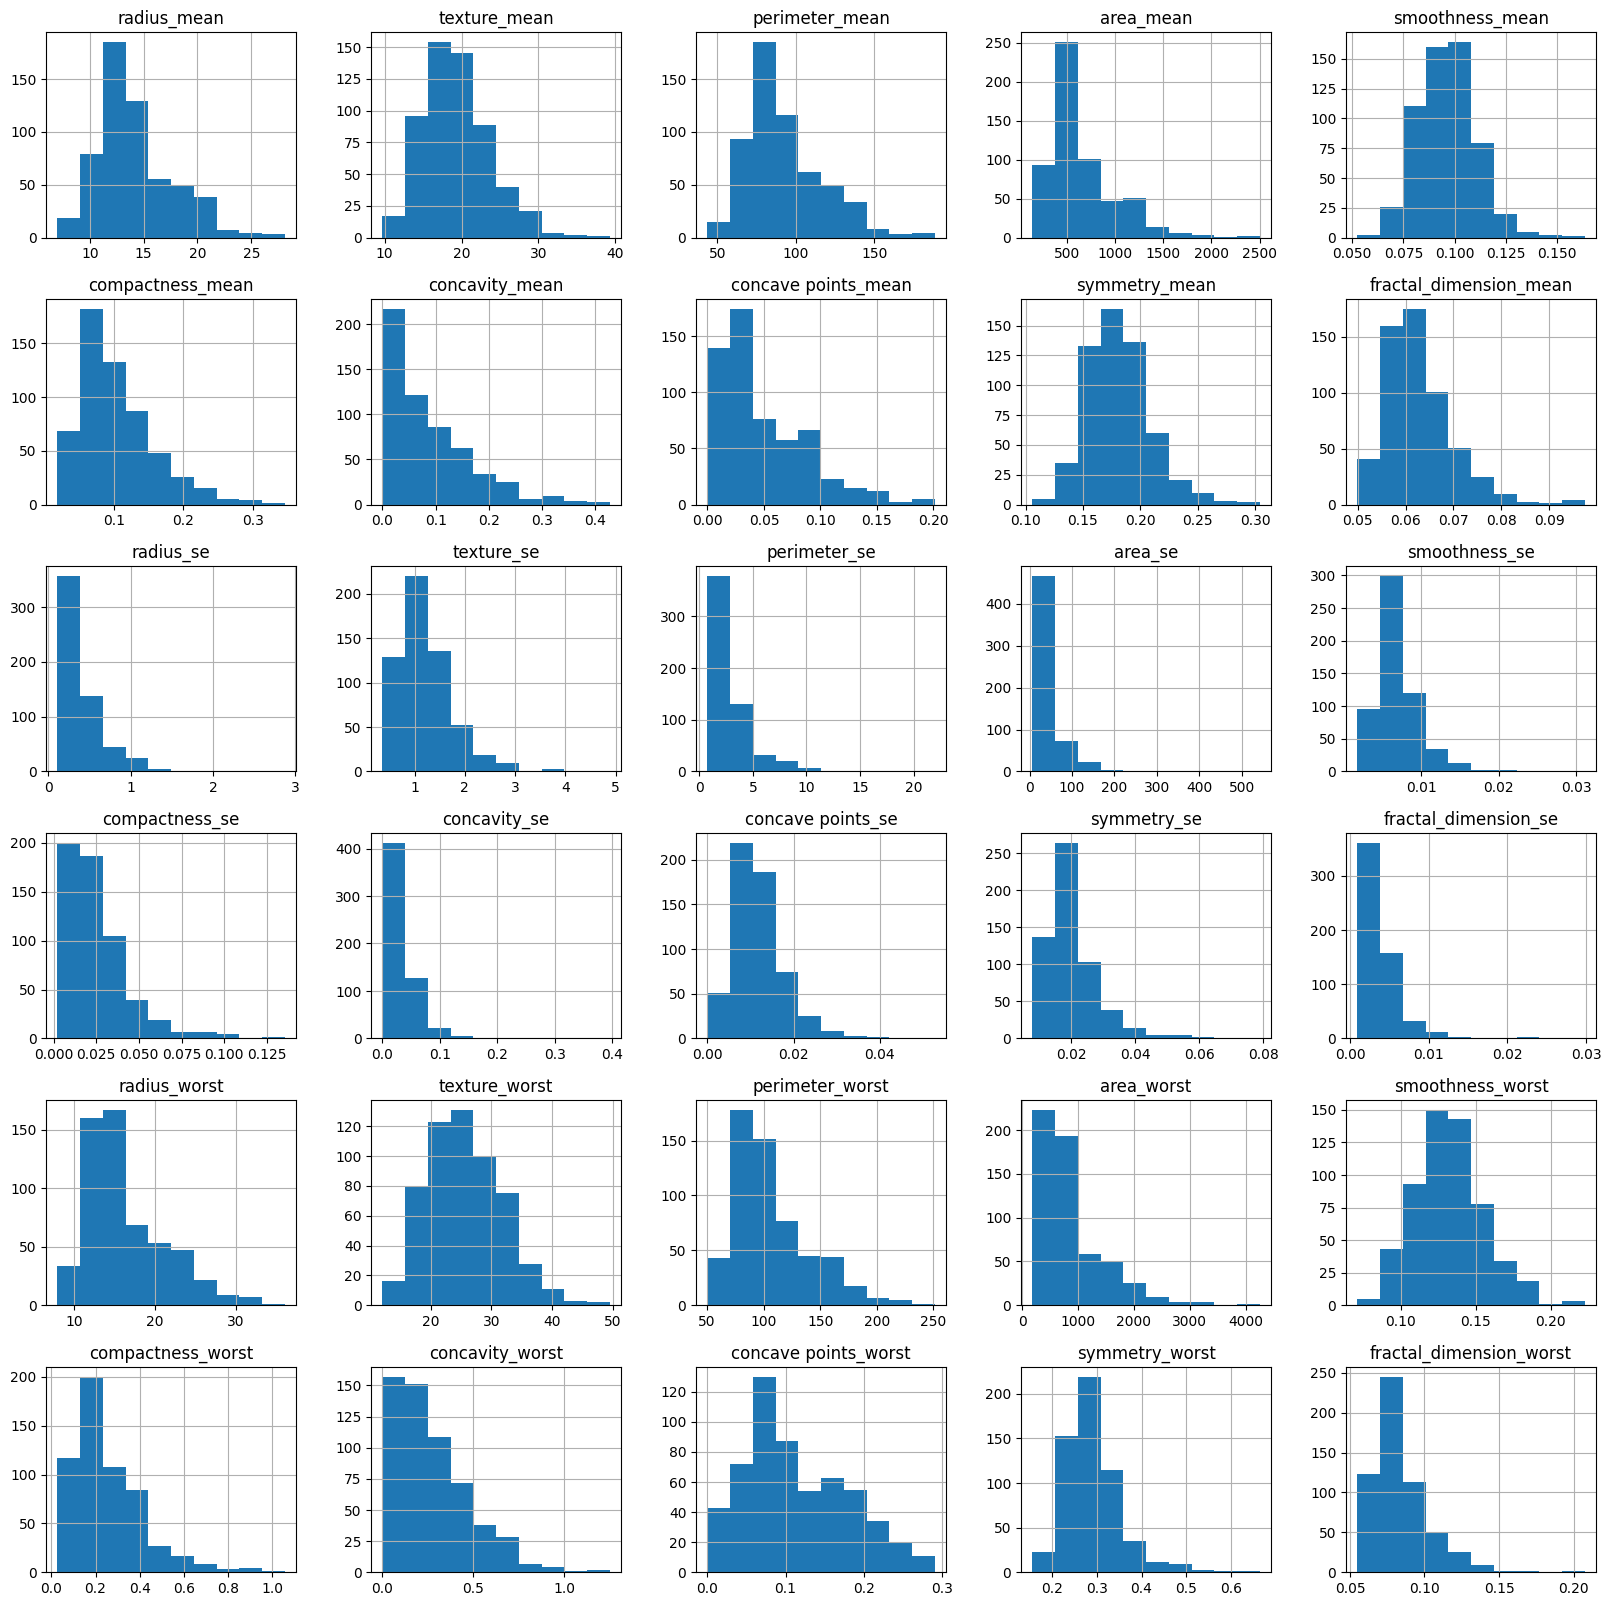

In [10]:
df[features].hist(figsize=(20,20))

### Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

In [11]:
cols_ser = df.drop(to_drop, axis=1).nunique()
cols_cat = cols_ser[cols_ser<=10].index.tolist()
cols_num = cols_ser[cols_ser>10].index.tolist()
print(f'категориальные столбцы - {cols_cat}\nчисловые столбцы - {cols_num}')

категориальные столбцы - []
числовые столбцы - ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


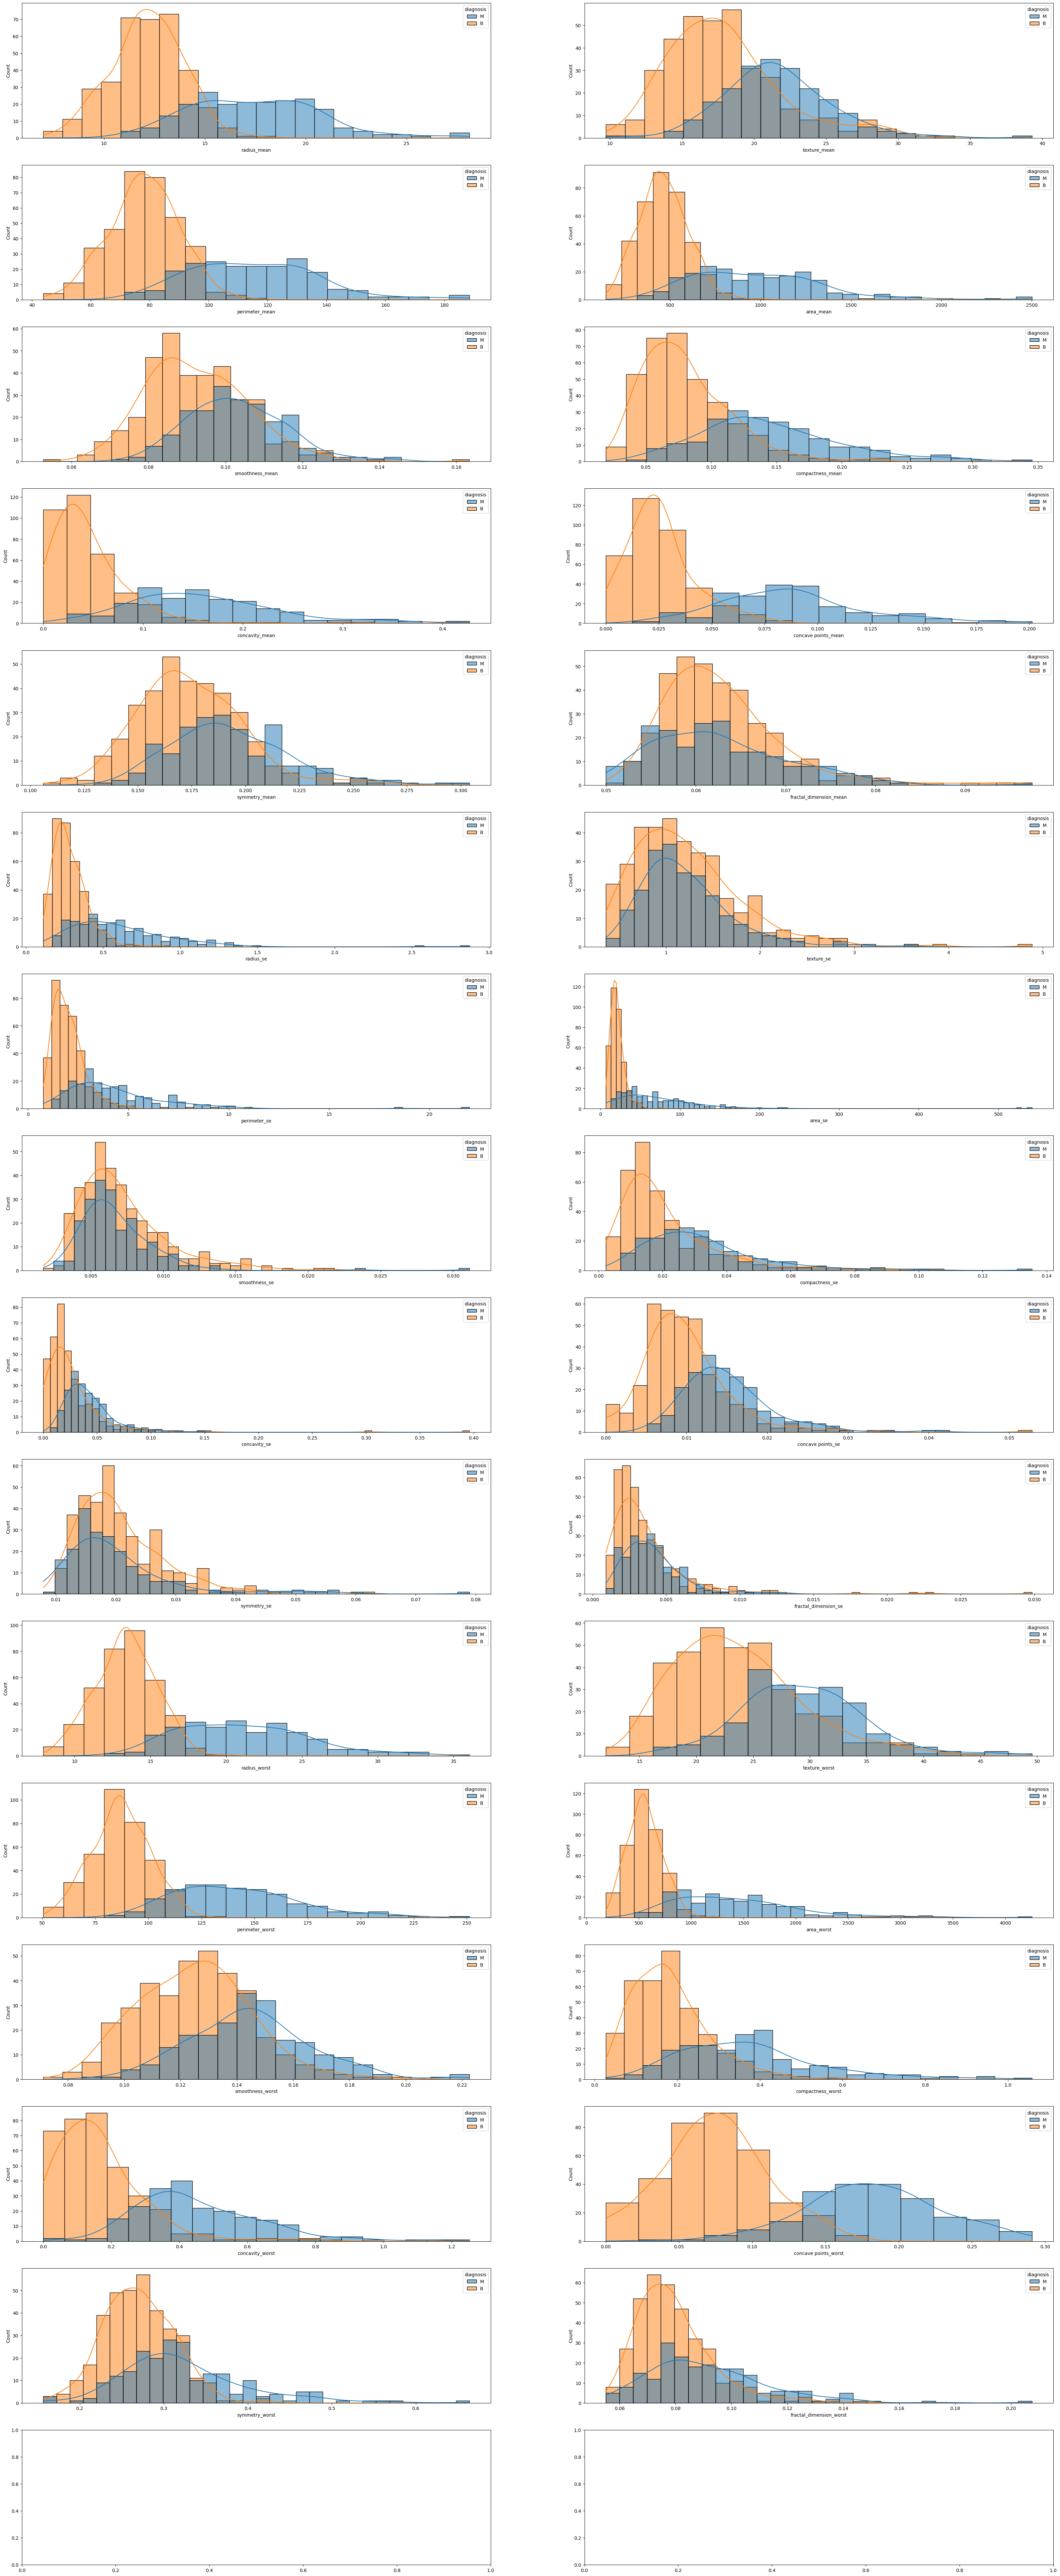

In [12]:
ncols = 2
nrows = (len(cols_cat)+len(cols_num))//ncols + 1
fig, axis = plt.subplots(nrows,ncols, figsize=(40,100))

for ax_i, col in zip(axis.flatten(),cols_num+cols_cat):
    if col in cols_cat:
        sns.countplot(data=df, x = col, ax = ax_i, hue='diagnosis')
    elif col in cols_num:
        sns.histplot(data=df, x=col, ax = ax_i, kde=True, hue='diagnosis')

### Построим матрицу корреляции признаков

In [23]:
df['diagnosis'] = [1 if i == 'M' else 0 for i in df['diagnosis']]
df.head().T

,0,1,2,3,4
id,842302.000000,842517.000000,8.430090e+07,8.434830e+07,8.435840e+07
diagnosis,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
radius_mean,17.990000,20.570000,1.969000e+01,1.142000e+01,2.029000e+01
texture_mean,10.380000,17.770000,2.125000e+01,2.038000e+01,1.434000e+01
perimeter_mean,122.800000,132.900000,1.300000e+02,7.758000e+01,1.351000e+02
area_mean,1001.000000,1326.000000,1.203000e+03,3.861000e+02,1.297000e+03
smoothness_mean,0.118400,0.084740,1.096000e-01,1.425000e-01,1.003000e-01
compactness_mean,0.277600,0.078640,1.599000e-01,2.839000e-01,1.328000e-01
concavity_mean,0.300100,0.086900,1.974000e-01,2.414000e-01,1.980000e-01
concave points_mean,0.147100,0.070170,1.279000e-01,1.052000e-01,1.043000e-01


In [26]:
features = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'
]

<Axes: >

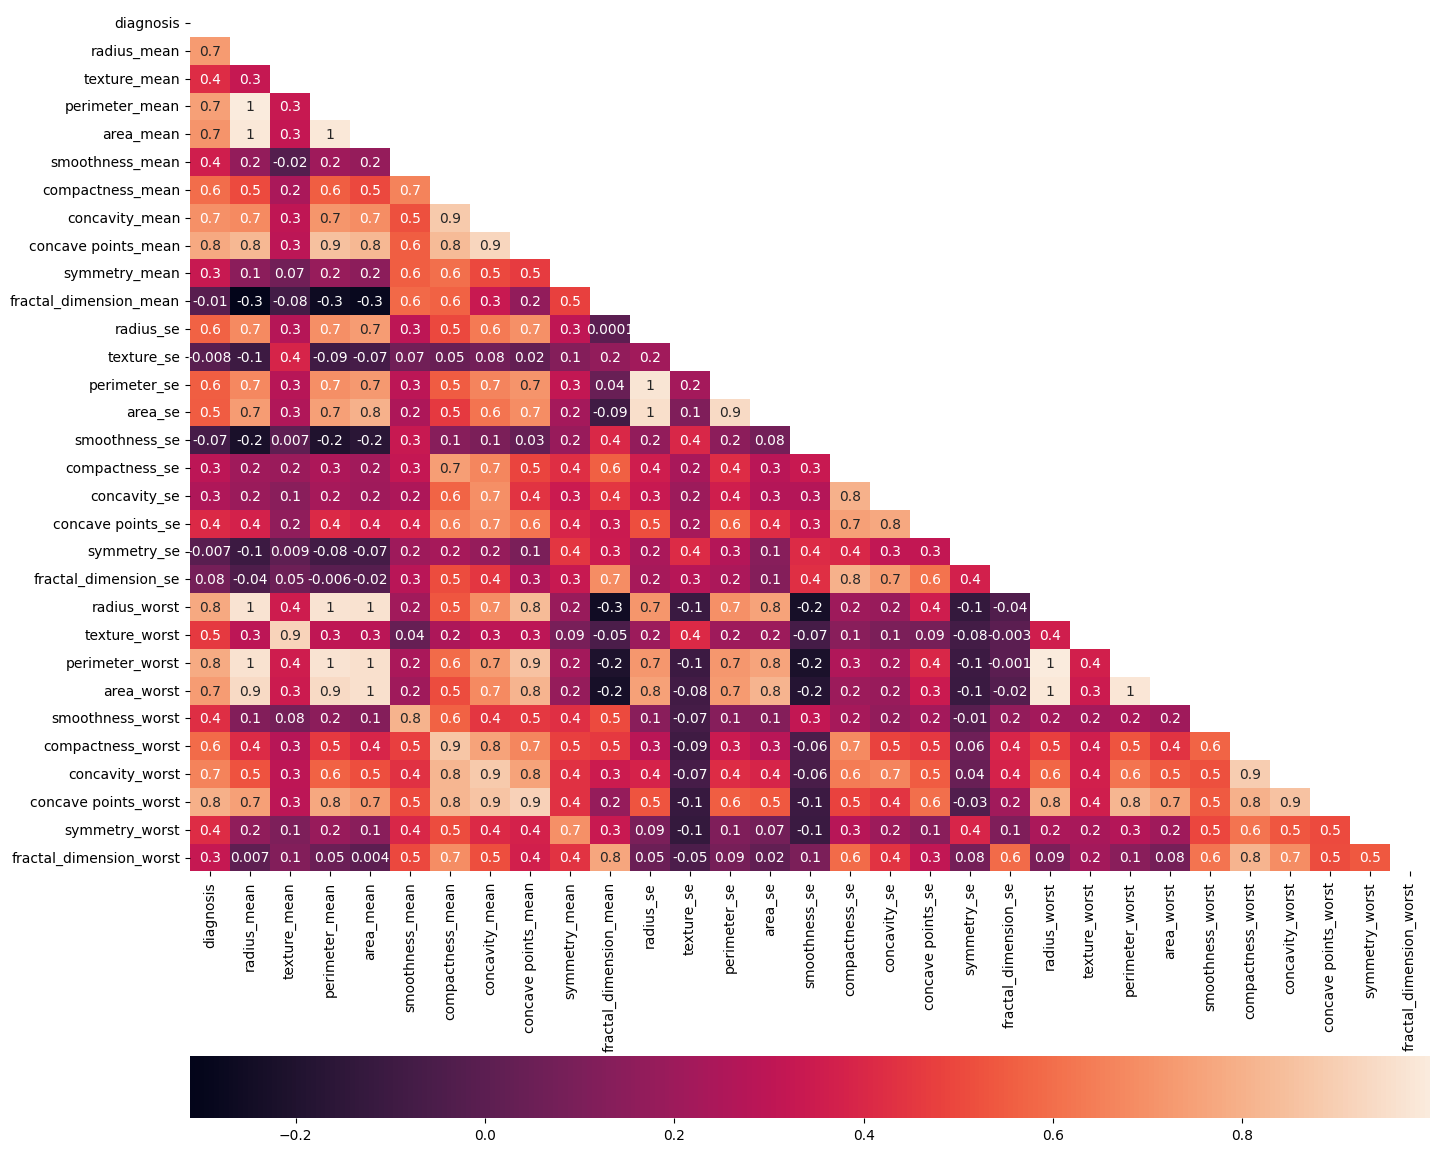

In [30]:
matrix = np.triu(df[features].corr())
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df[features].corr(), annot = True, mask=matrix, fmt='.1g', cbar_kws= {'orientation': 'horizontal'})

## С целевой переменной diagnosis хорошо коррелируют признаки:
### perimeter_mean, area_mean, concavity_mean, concave points_mean, radius_worst, perimeter_worst, concavity_worst, concave points_worst
## Не очень хорошо коррелируют:
### fractal_dimension_mean, texture_se, smoothness_se, symmetry_se, fractal_dimension_se
## Выведем перечень признаков, которые хорошо коррелируют между собой (>0.9)

In [32]:
corr_matrix = df.corr().abs()

In [34]:
high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = high_corr[high_corr > 0.9].stack().reset_index().sort_values(by=0, ascending=False, ignore_index=True)
high_corr.columns = ['feature_1', 'feature_2', 'correlation']
high_corr

,feature_1,feature_2,correlation
0,radius_mean,perimeter_mean,0.997855
1,radius_worst,perimeter_worst,0.993708
2,radius_mean,area_mean,0.987357
3,perimeter_mean,area_mean,0.986507
4,radius_worst,area_worst,0.984015
5,perimeter_worst,area_worst,0.977578
6,radius_se,perimeter_se,0.972794
7,perimeter_mean,perimeter_worst,0.970387
8,radius_mean,radius_worst,0.969539
9,perimeter_mean,radius_worst,0.969476


## Построим для сильно скоррелированных признаков попарные scatterplot-ы, наблюдается линейная зависимость.

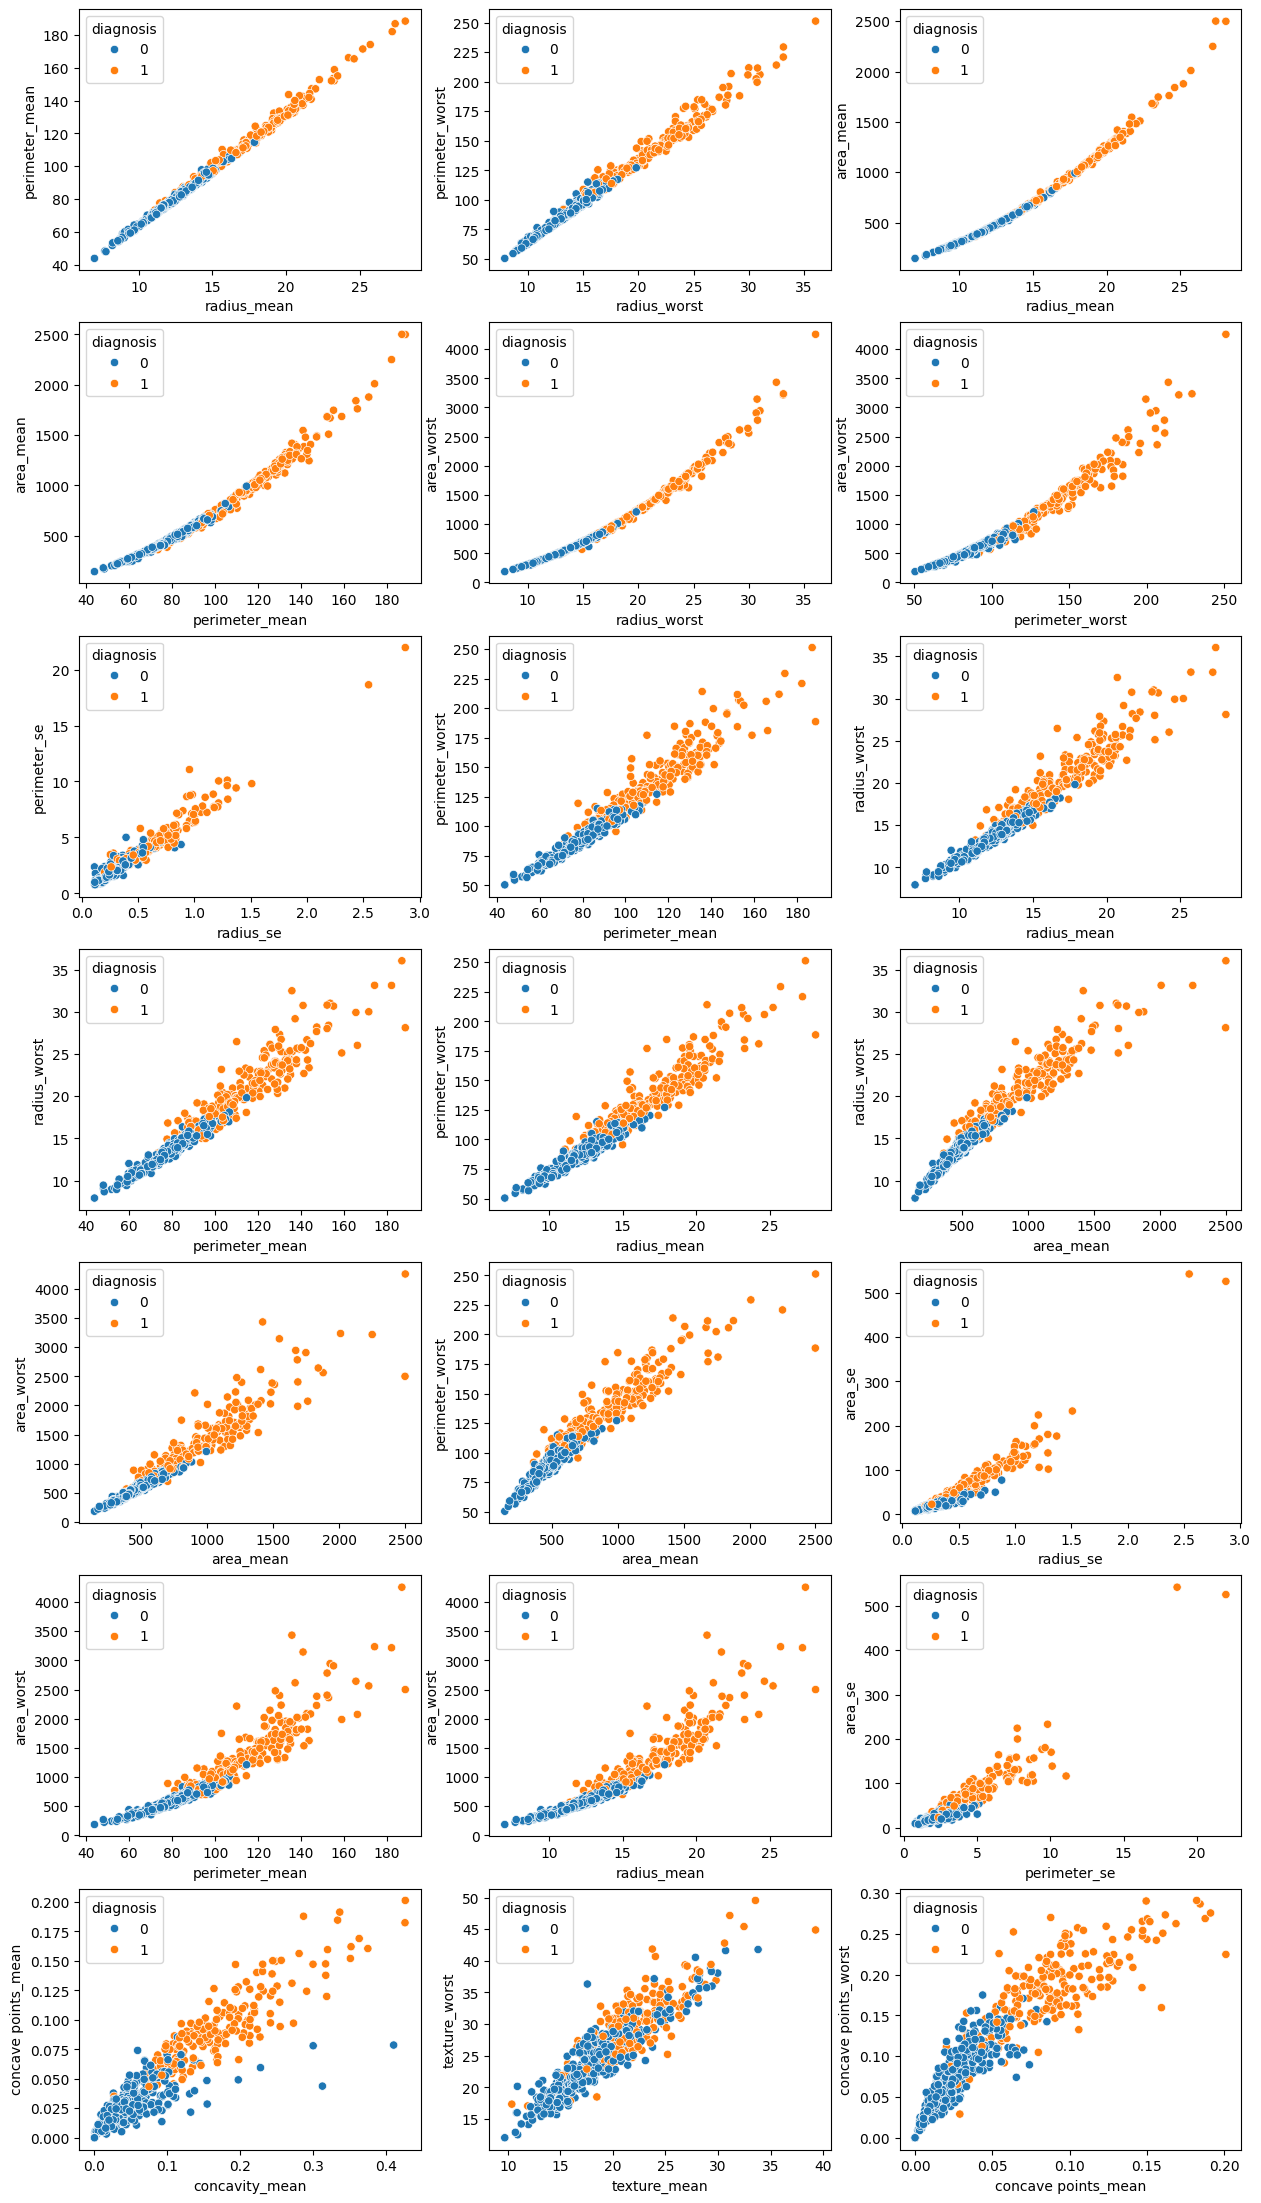

In [36]:
plt.figure(figsize=(15, 40))

for i,  (feature_1, feature_2) in enumerate(zip(high_corr['feature_1'], high_corr['feature_2'])):
    plt.subplot(10, 3, i + 1)
    sns.scatterplot(data=df, x=feature_1, y=feature_2, hue='diagnosis')

plt.show()

## Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

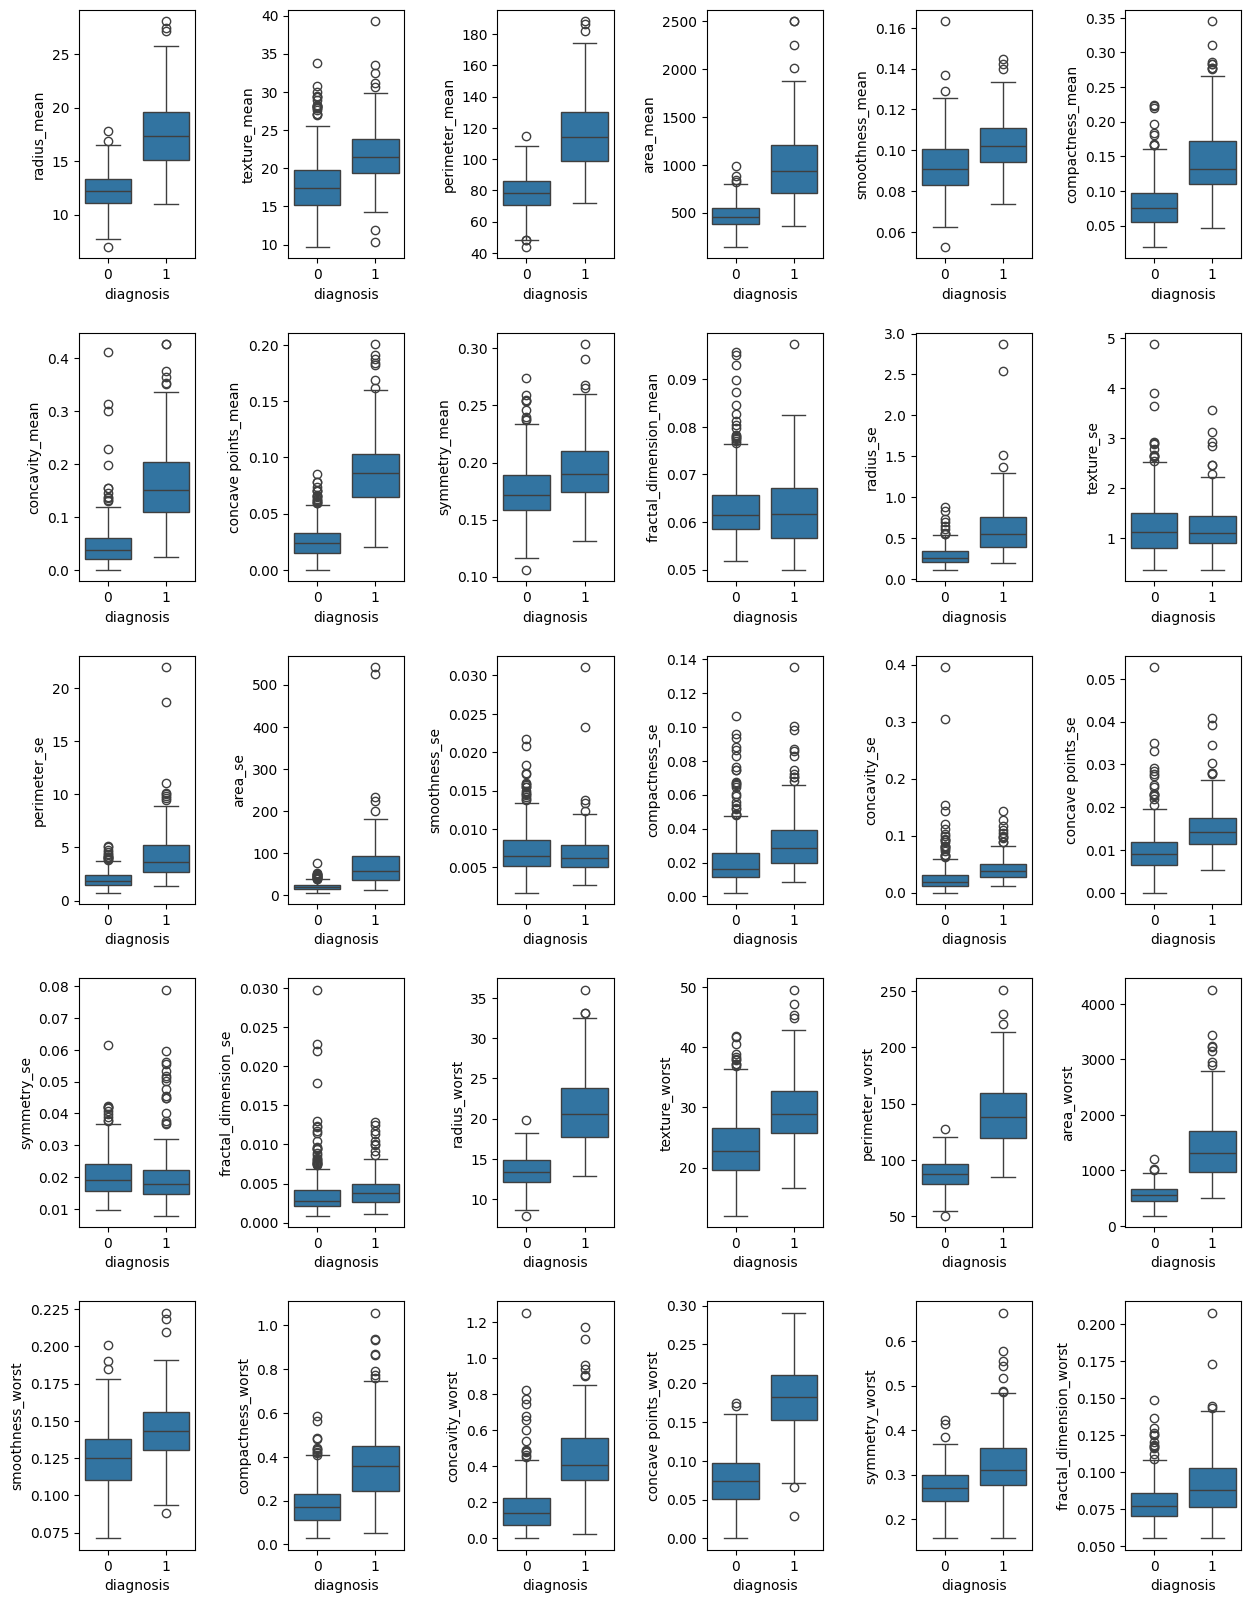

In [39]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(df.drop(columns=['id', 'diagnosis', 'Unnamed: 32']).columns):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(data=df, x='diagnosis', y=feature)

plt.subplots_adjust(wspace=0.8, hspace=0.3)
plt.show()

### Несколько признаков имеют выраженные отличия для целевой переменной. Выберем, например, perimeter_worst. Предположим значение для отнесения к тому или иному диагнозу и посмотрим насколько мы можем угадать результат по одному признаку.

### Предположим значение и посчитаем TP и FP

197 33 212


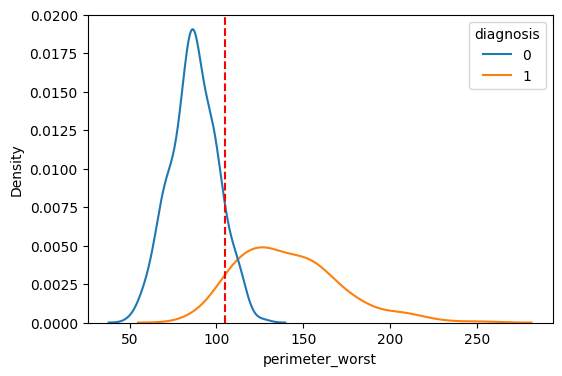

In [44]:
pw_pred=105
print(len(df[(df['perimeter_worst'] > pw_pred) &(df['diagnosis']==1)]), 
len(df[(df['perimeter_worst'] > pw_pred) &(df['diagnosis']==0)]), 
len(df[df['diagnosis']==1]))

plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='perimeter_worst', hue='diagnosis')
plt.axvline(x=pw_pred, color='r', linestyle='--')
plt.show()

### Разобьем данные на train-test, отложив 30% выборки для тестирования. Посчитаем наше предсказание и посмотрим на метрики.

In [56]:
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_test_pred_no_ml = X_test['perimeter_worst'].apply(lambda x: 1 if x > pw_pred else 0)

print(classification_report(y_test, y_test_pred_no_ml, digits=3))

roc_auc = roc_auc_score(y_test, y_test_pred_no_ml)
print(f'ROC-AUC: {roc_auc:.3f}')

confusion = confusion_matrix(y_test, y_test_pred_no_ml)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0      0.990     0.935     0.962       108
           1      0.899     0.984     0.939        63

    accuracy                          0.953       171
   macro avg      0.944     0.960     0.951       171
weighted avg      0.956     0.953     0.954       171

ROC-AUC: 0.960
Матрица ошибок:
[[101   7]
 [  1  62]]


### Получен хороший результат предсказаний по одному признаку. 

In [ ]:
features = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'
]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Часть 2. Моделирование при помощи kNN

### Разбейте данные на train-test, отложив 30% выборки для тестирования.

In [51]:
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Приведем все непрерывные переменные к одному масштабу при помощи стандартизации. Разный масштаб значений признаков вызовет доминирование признаков с большими значениями и может исказить результат.

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Построим модель kNN "из коробки" без настройки параметров.

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Оценим метрики качества бинарной классификации (accuracy, precision, recall, f1_score). Построим матрицу ошибок.

In [54]:
print(classification_report(y_test, y_pred, digits=3))

confusion = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0      0.963     0.972     0.968       108
           1      0.952     0.937     0.944        63

    accuracy                          0.959       171
   macro avg      0.957     0.954     0.956       171
weighted avg      0.959     0.959     0.959       171

Матрица ошибок:
[[105   3]
 [  4  59]]


ROC-AUC: 0.9787


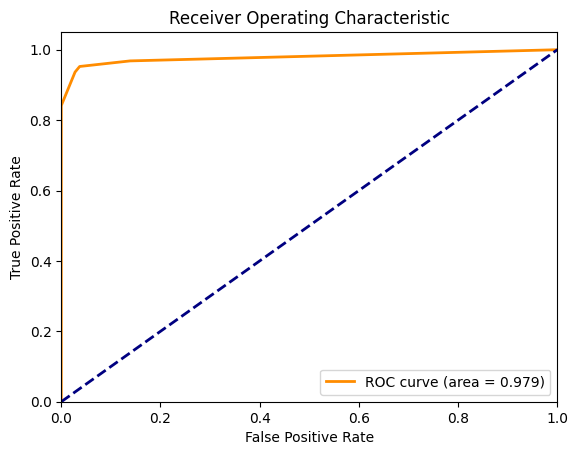

In [55]:
y_score = knn.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print(f'ROC-AUC: {roc_auc:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Проведем настройку параметра числа соседей на кросс-валидации. Снова оценим результат.

In [57]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [58]:
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

confusion = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0      0.955     0.981     0.968       108
           1      0.967     0.921     0.943        63

    accuracy                          0.959       171
   macro avg      0.961     0.951     0.956       171
weighted avg      0.959     0.959     0.959       171

Матрица ошибок:
[[106   2]
 [  5  58]]


ROC-AUC: 0.996


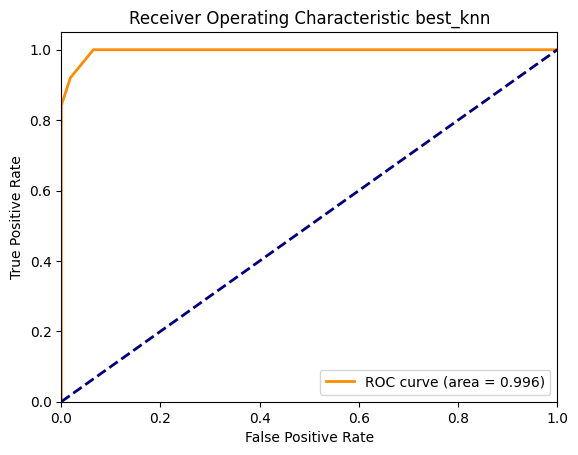

In [59]:
y_score = best_knn.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print(f'ROC-AUC: {roc_auc:.3f}')

fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic best_knn')
plt.legend(loc="lower right")
plt.show()

### Очевидно, результат улучшился.

## Бонусное задание для любопытствующих, к которому можно вернуться после изучения логистической регрессии: Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85.

### Постройте модель логистической регрессии "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.

In [61]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

confusion = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0     0.9640    0.9907    0.9772       108
           1     0.9833    0.9365    0.9593        63

    accuracy                         0.9708       171
   macro avg     0.9736    0.9636    0.9683       171
weighted avg     0.9711    0.9708    0.9706       171

Матрица ошибок:
[[107   1]
 [  4  59]]


C:\Users\dunai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC: 0.9968


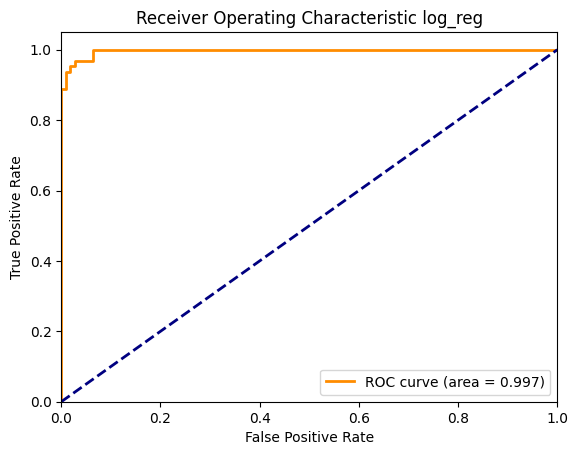

In [62]:
y_score = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print(f'ROC-AUC: {roc_auc:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic log_reg')
plt.legend(loc="lower right")
plt.show()

### Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). 

In [63]:
log_reg_cv = LogisticRegressionCV(Cs=10, cv=5, scoring='recall_weighted', random_state=42, max_iter=1000)
log_reg_cv.fit(X_train, y_train)

y_pred_cv = log_reg_cv.predict(X_test)

C:\Users\dunai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dunai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [64]:
print(classification_report(y_test, y_pred_cv, digits=4))

confusion = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0     0.9906    0.9722    0.9813       108
           1     0.9538    0.9841    0.9688        63

    accuracy                         0.9766       171
   macro avg     0.9722    0.9782    0.9750       171
weighted avg     0.9770    0.9766    0.9767       171

Матрица ошибок:
[[107   1]
 [  4  59]]


ROC-AUC: 0.9972


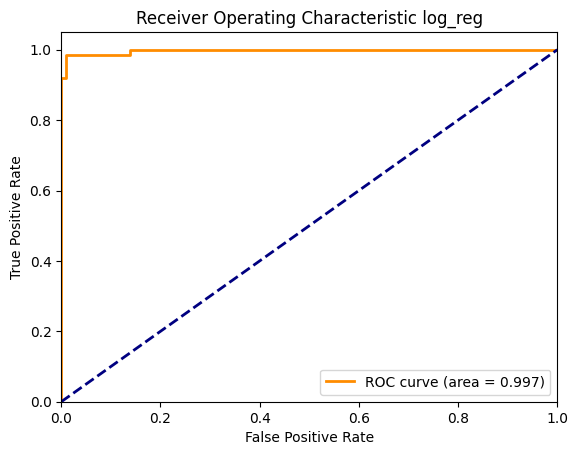

In [65]:
y_score = log_reg_cv.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print(f'ROC-AUC: {roc_auc:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic log_reg')
plt.legend(loc="lower right")
plt.show()

## Уберем переменные, корреляция Пирсона между которыми превышает 0.85

In [67]:
data_fp = df.drop(columns=['id', 'Unnamed: 32'])

correlation_matrix = data_fp.corr().abs()

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape, dtype=bool), k=1))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]

data_filtered = data_fp.drop(columns=to_drop)


Данные после удаления переменных с корреляцией > 0.85:


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2364,0.07678


In [69]:
print("\nДанные после удаления переменных с корреляцией > 0.85:")
data_filtered.head().T


Данные после удаления переменных с корреляцией > 0.85:


,0,1,2,3,4
diagnosis,1.000000,1.000000,1.000000,1.000000,1.000000
radius_mean,17.990000,20.570000,19.690000,11.420000,20.290000
texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000
smoothness_mean,0.118400,0.084740,0.109600,0.142500,0.100300
compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800
symmetry_mean,0.241900,0.181200,0.206900,0.259700,0.180900
fractal_dimension_mean,0.078710,0.056670,0.059990,0.097440,0.058830
radius_se,1.095000,0.543500,0.745600,0.495600,0.757200
texture_se,0.905300,0.733900,0.786900,1.156000,0.781300
smoothness_se,0.006399,0.005225,0.006150,0.009110,0.011490


In [70]:
X = data_filtered.drop(columns=['diagnosis'])
y = data_filtered['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

confusion = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0     0.9279    0.9537    0.9406       108
           1     0.9167    0.8730    0.8943        63

    accuracy                         0.9240       171
   macro avg     0.9223    0.9134    0.9175       171
weighted avg     0.9238    0.9240    0.9236       171

Матрица ошибок:
[[103   5]
 [  8  55]]


### Получили результат хуже, чем на всех признаках. Теперь проведем настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV) на малом списке параметров.

In [72]:
log_reg_cv = LogisticRegressionCV(Cs=10, cv=5, scoring='recall_weighted', random_state=42, max_iter=1000)
log_reg_cv.fit(X_train, y_train)

y_pred_cv = log_reg_cv.predict(X_test)

print(classification_report(y_test, y_pred_cv, digits=4))

confusion = confusion_matrix(y_test, y_pred_cv)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0     0.9907    0.9815    0.9860       108
           1     0.9688    0.9841    0.9764        63

    accuracy                         0.9825       171
   macro avg     0.9797    0.9828    0.9812       171
weighted avg     0.9826    0.9825    0.9825       171

Матрица ошибок:
[[106   2]
 [  1  62]]


ROC-AUC: 0.9868
ROC-AUC: 0.9969


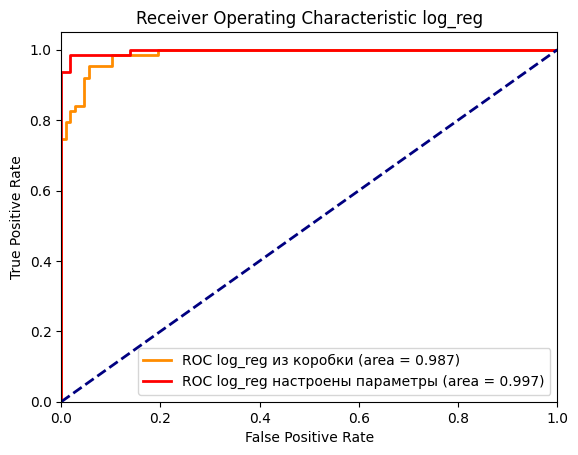

In [73]:
y_score = log_reg.predict_proba(X_test)[:, 1]
y_score_cv = log_reg_cv.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_score)
roc_auc_cv = roc_auc_score(y_test, y_score_cv)

print(f'ROC-AUC: {roc_auc:.4f}')
print(f'ROC-AUC: {roc_auc_cv:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, y_score)
fpr_cv, tpr_cv, thresholds = roc_curve(y_test, y_score_cv)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC log_reg из коробки (area = %0.3f)' % roc_auc)
plt.plot(fpr_cv, tpr_cv, color='red', lw=2, label='ROC log_reg настроены параметры (area = %0.3f)' % roc_auc_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic log_reg')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Выводы: Если оставить все признаки в датасете, то логистическая регрессия без настройки параметров сделала такой же результат, как и с настройкой параметров. А в случае удаления линейно зависимых признаков с корреляцией Пирсона более 0.85 модель смогла показать тот же результат только после настройки параметров.